In [53]:
#Jonathan Stewart
#INSD 5170 Final Project Part IV  Logistic Regression

#Data loading Step and loading libraries

%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

filename = "C:/Users/jws0258/Documents/pima_diabetes.csv"


names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)

First, some initial Exploratory data analysis will be done on the dataset. This includes visualization techniques, bar plots, box plots, histograms, and a multivariate scatter matrix. Below, a bar plot of the Iris data set variables will be shown. 

<IPython.core.display.Javascript object>


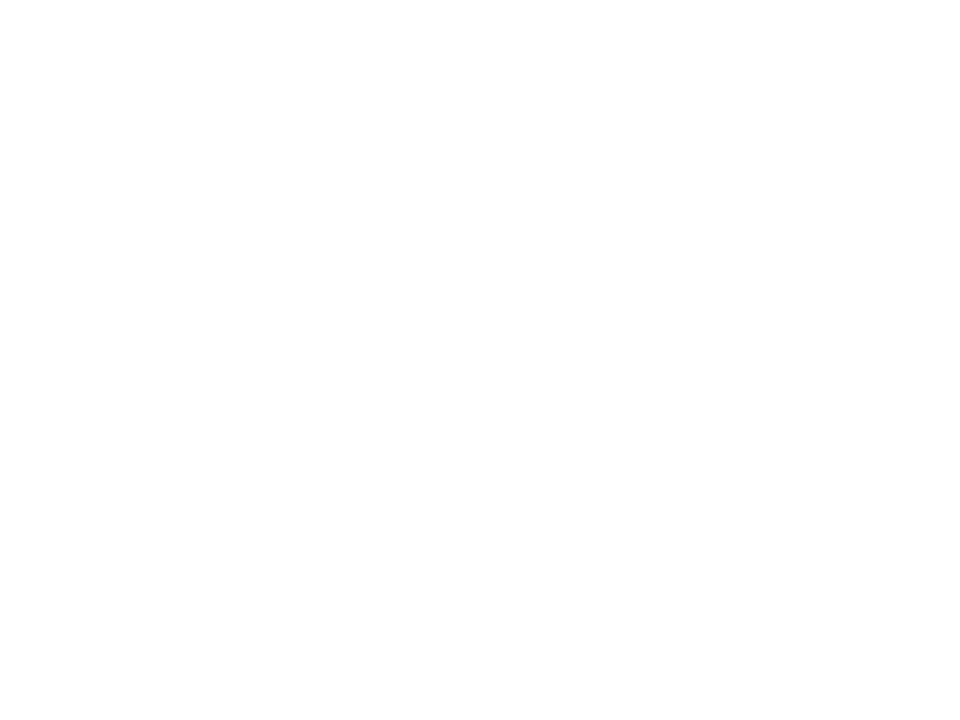

<IPython.core.display.Javascript object>


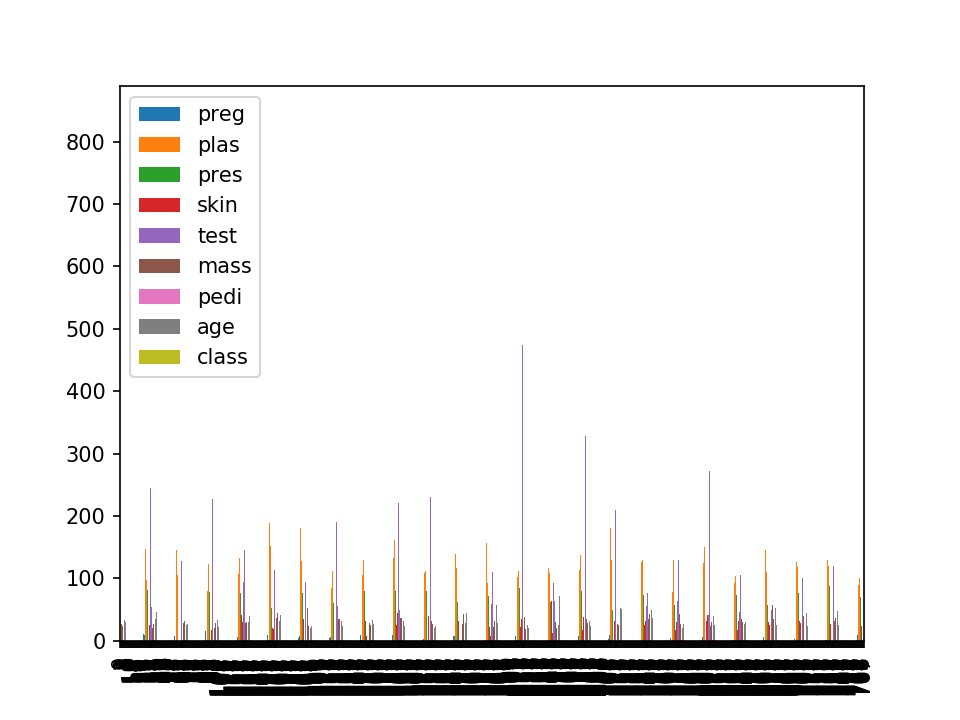

In [4]:
#bar plot
plt.figure();


df.plot(kind='bar')
#plt.figure(); df.plot();

Next a histogram of the data will be shown.

<IPython.core.display.Javascript object>


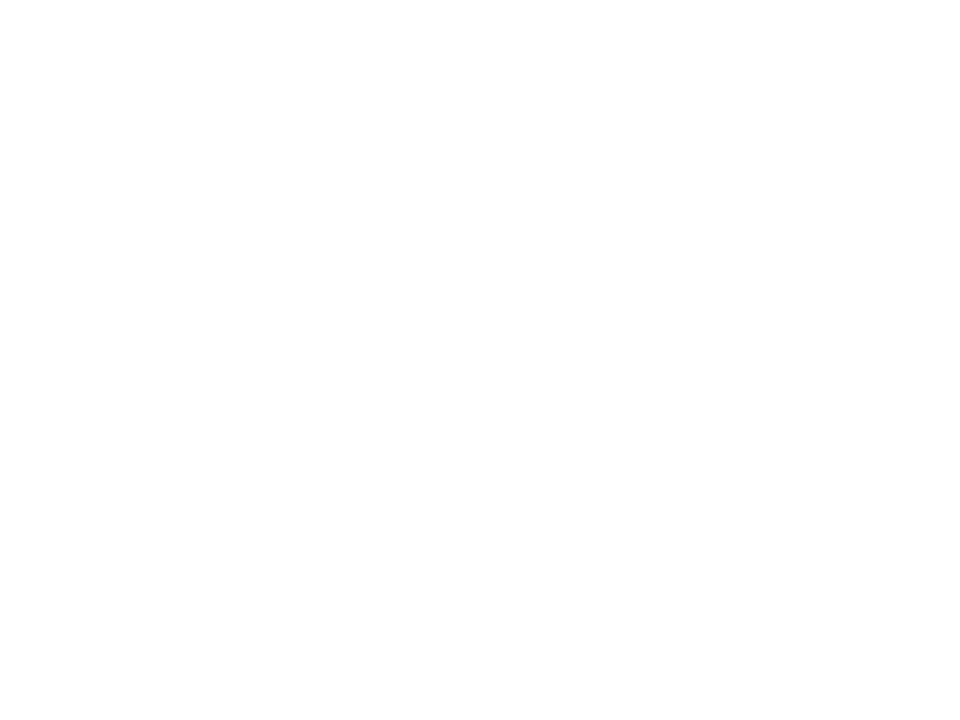

<IPython.core.display.Javascript object>


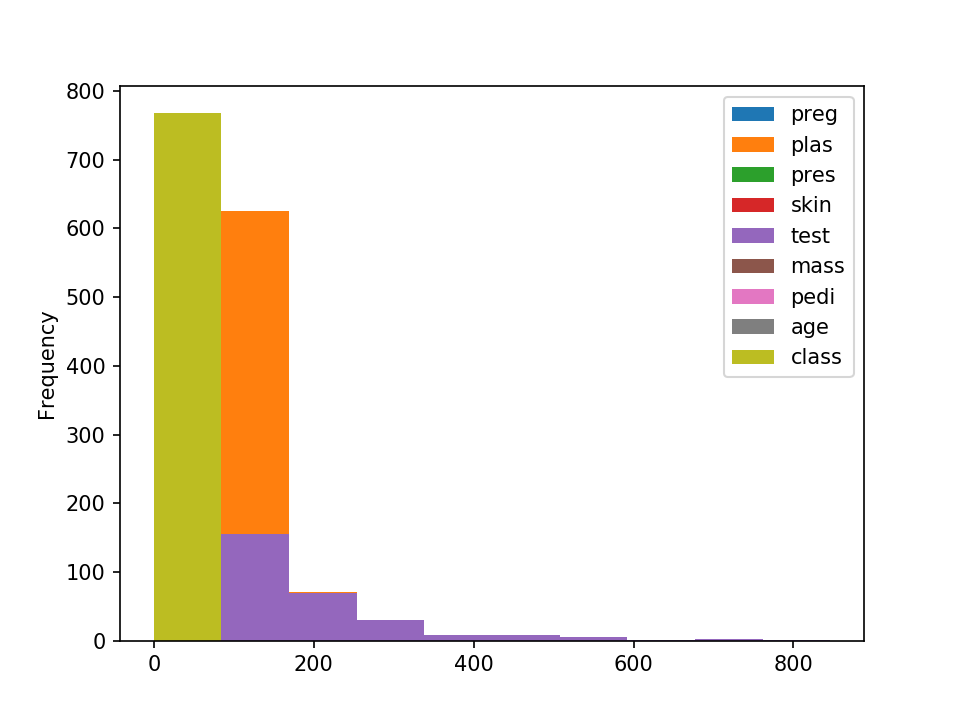

In [5]:

#histogram of data
plt.figure();


df.plot(kind='hist')

Now, a box plot of the variables will be shown. The petal length seems to have the largest inner quartile among the predictor variables.

<IPython.core.display.Javascript object>


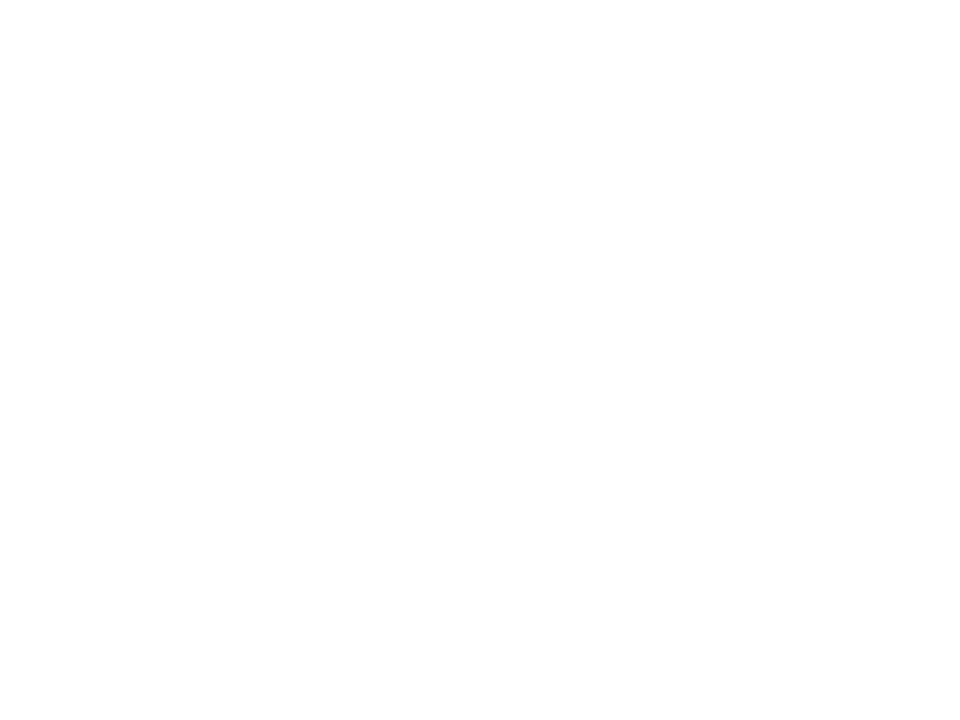

<IPython.core.display.Javascript object>


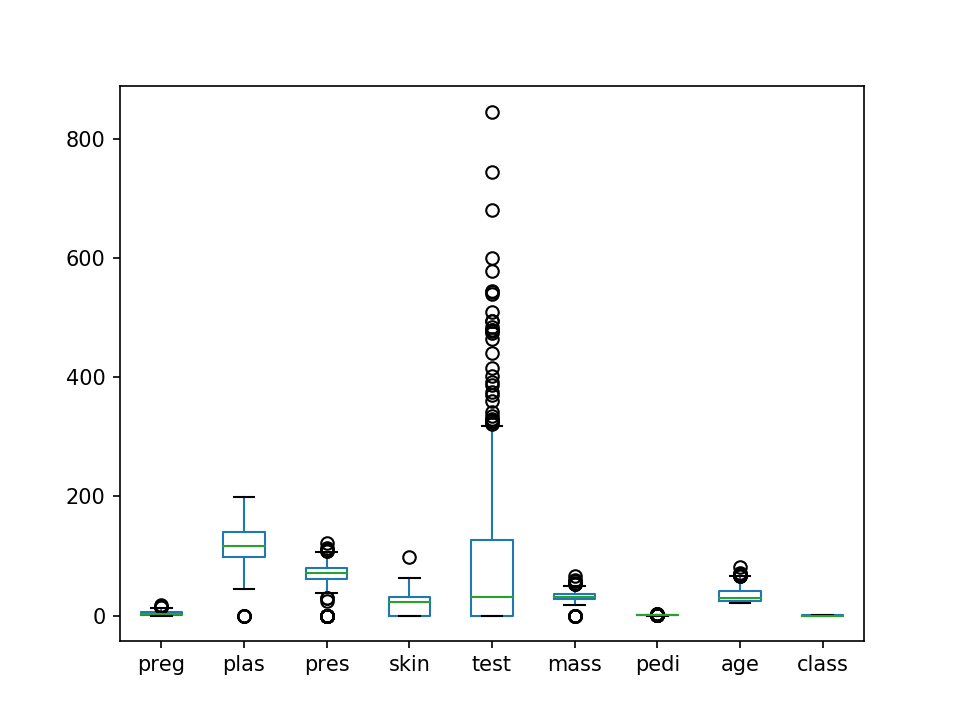

In [6]:
#Box Plot 
plt.figure();
#df.iloc[1].plot(kind='bar')
#df.iloc[2].plot(kind='bar')
#df.iloc[3].plot(kind='bar')


df.plot(kind='box')

And finally, a scatter matrix plot, showing each variable plotted against each other variable as a scatter plot, is shown below.
Several of the variables seem to have a relationship, and in several cases, it is a nonlinear correlation.

<IPython.core.display.Javascript object>


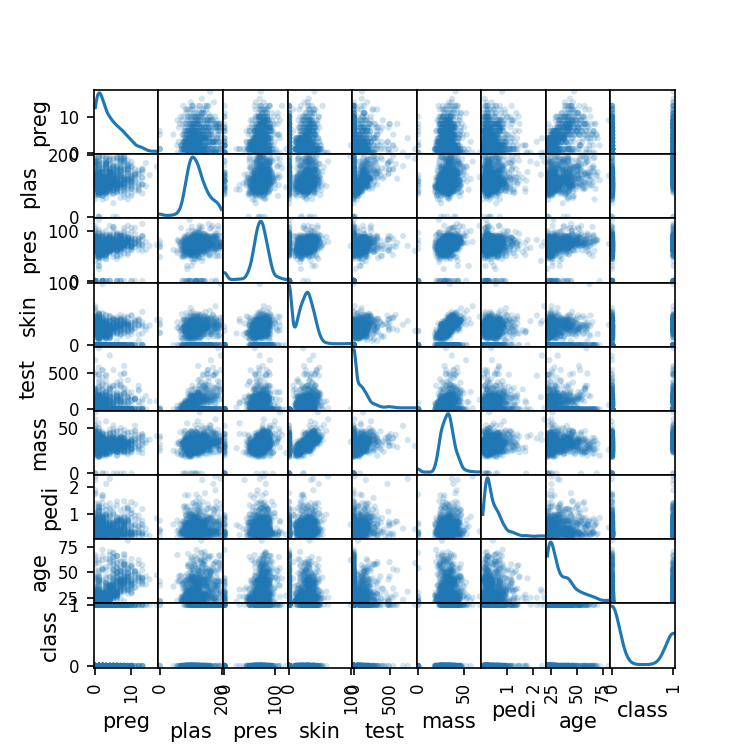

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D652AA2C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D65822A160>]], dtype=object)

In [7]:
#scatter matrix
from pandas.plotting import scatter_matrix


scatter_matrix(df, alpha=0.2, figsize=(5, 5), diagonal='kde')


Now that the data has been explored with the above visualizations, a logistic regression will be used as a predictive model. First, the relevant libraries used for logistic regression and cross validation will be loaded.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report

Before inputing the data to a predictive model, the data must be formatted so that any samples with zero values are removed. To check for that, the following code is ran. The code replaces all zeros with 'NAN', and then checks for how many instances that occurs for by column.

From the above, it can be seen that there are several instances of zero values, with several hundred in the skin check. So, we do need to worry about how to handle zero valued input. Next, I will show the first five records for the dataset.

In [47]:
print(df.head(5))

   preg   plas  pres  skin   test  mass   pedi  age  class
0     6  148.0  72.0  35.0    NaN   NaN  0.627   50      1
1     1   85.0  66.0  29.0    NaN   NaN  0.351   31      0
2     8  183.0  64.0   NaN    NaN   NaN  0.672   32      1
3     1   89.0  66.0  23.0   94.0   NaN  0.167   21      0
4     0  137.0  40.0  35.0  168.0   NaN  2.288   33      1


I will also get summary statistics for the datasets. This will include the number of examples, mean, standard deviation, minimum, maximum, and quantiles of the data for each variable.

In [48]:
print(df.describe())

             preg        plas        pres        skin        test  mass  \
count  768.000000  763.000000  733.000000  541.000000  394.000000   0.0   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   NaN   
std      3.369578   30.535641   12.382158   10.476982  118.775855   NaN   
min      0.000000   44.000000   24.000000    7.000000   14.000000   NaN   
25%      1.000000   99.000000   64.000000   22.000000   76.250000   NaN   
50%      3.000000  117.000000   72.000000   29.000000  125.000000   NaN   
75%      6.000000  141.000000   80.000000   36.000000  190.000000   NaN   
max     17.000000  199.000000  122.000000   99.000000  846.000000   NaN   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.62625

Next, the goal is to see how many examples in this dataset belong to each class. This way, if there is a large imbalance in the dataset, this can be noticed ahead of time.

The number of examples per class in this dataset are evenly distributed. 

Next, some further exploratory data analysis will be performed. A histogram for each individual variable is shown below.

<IPython.core.display.Javascript object>


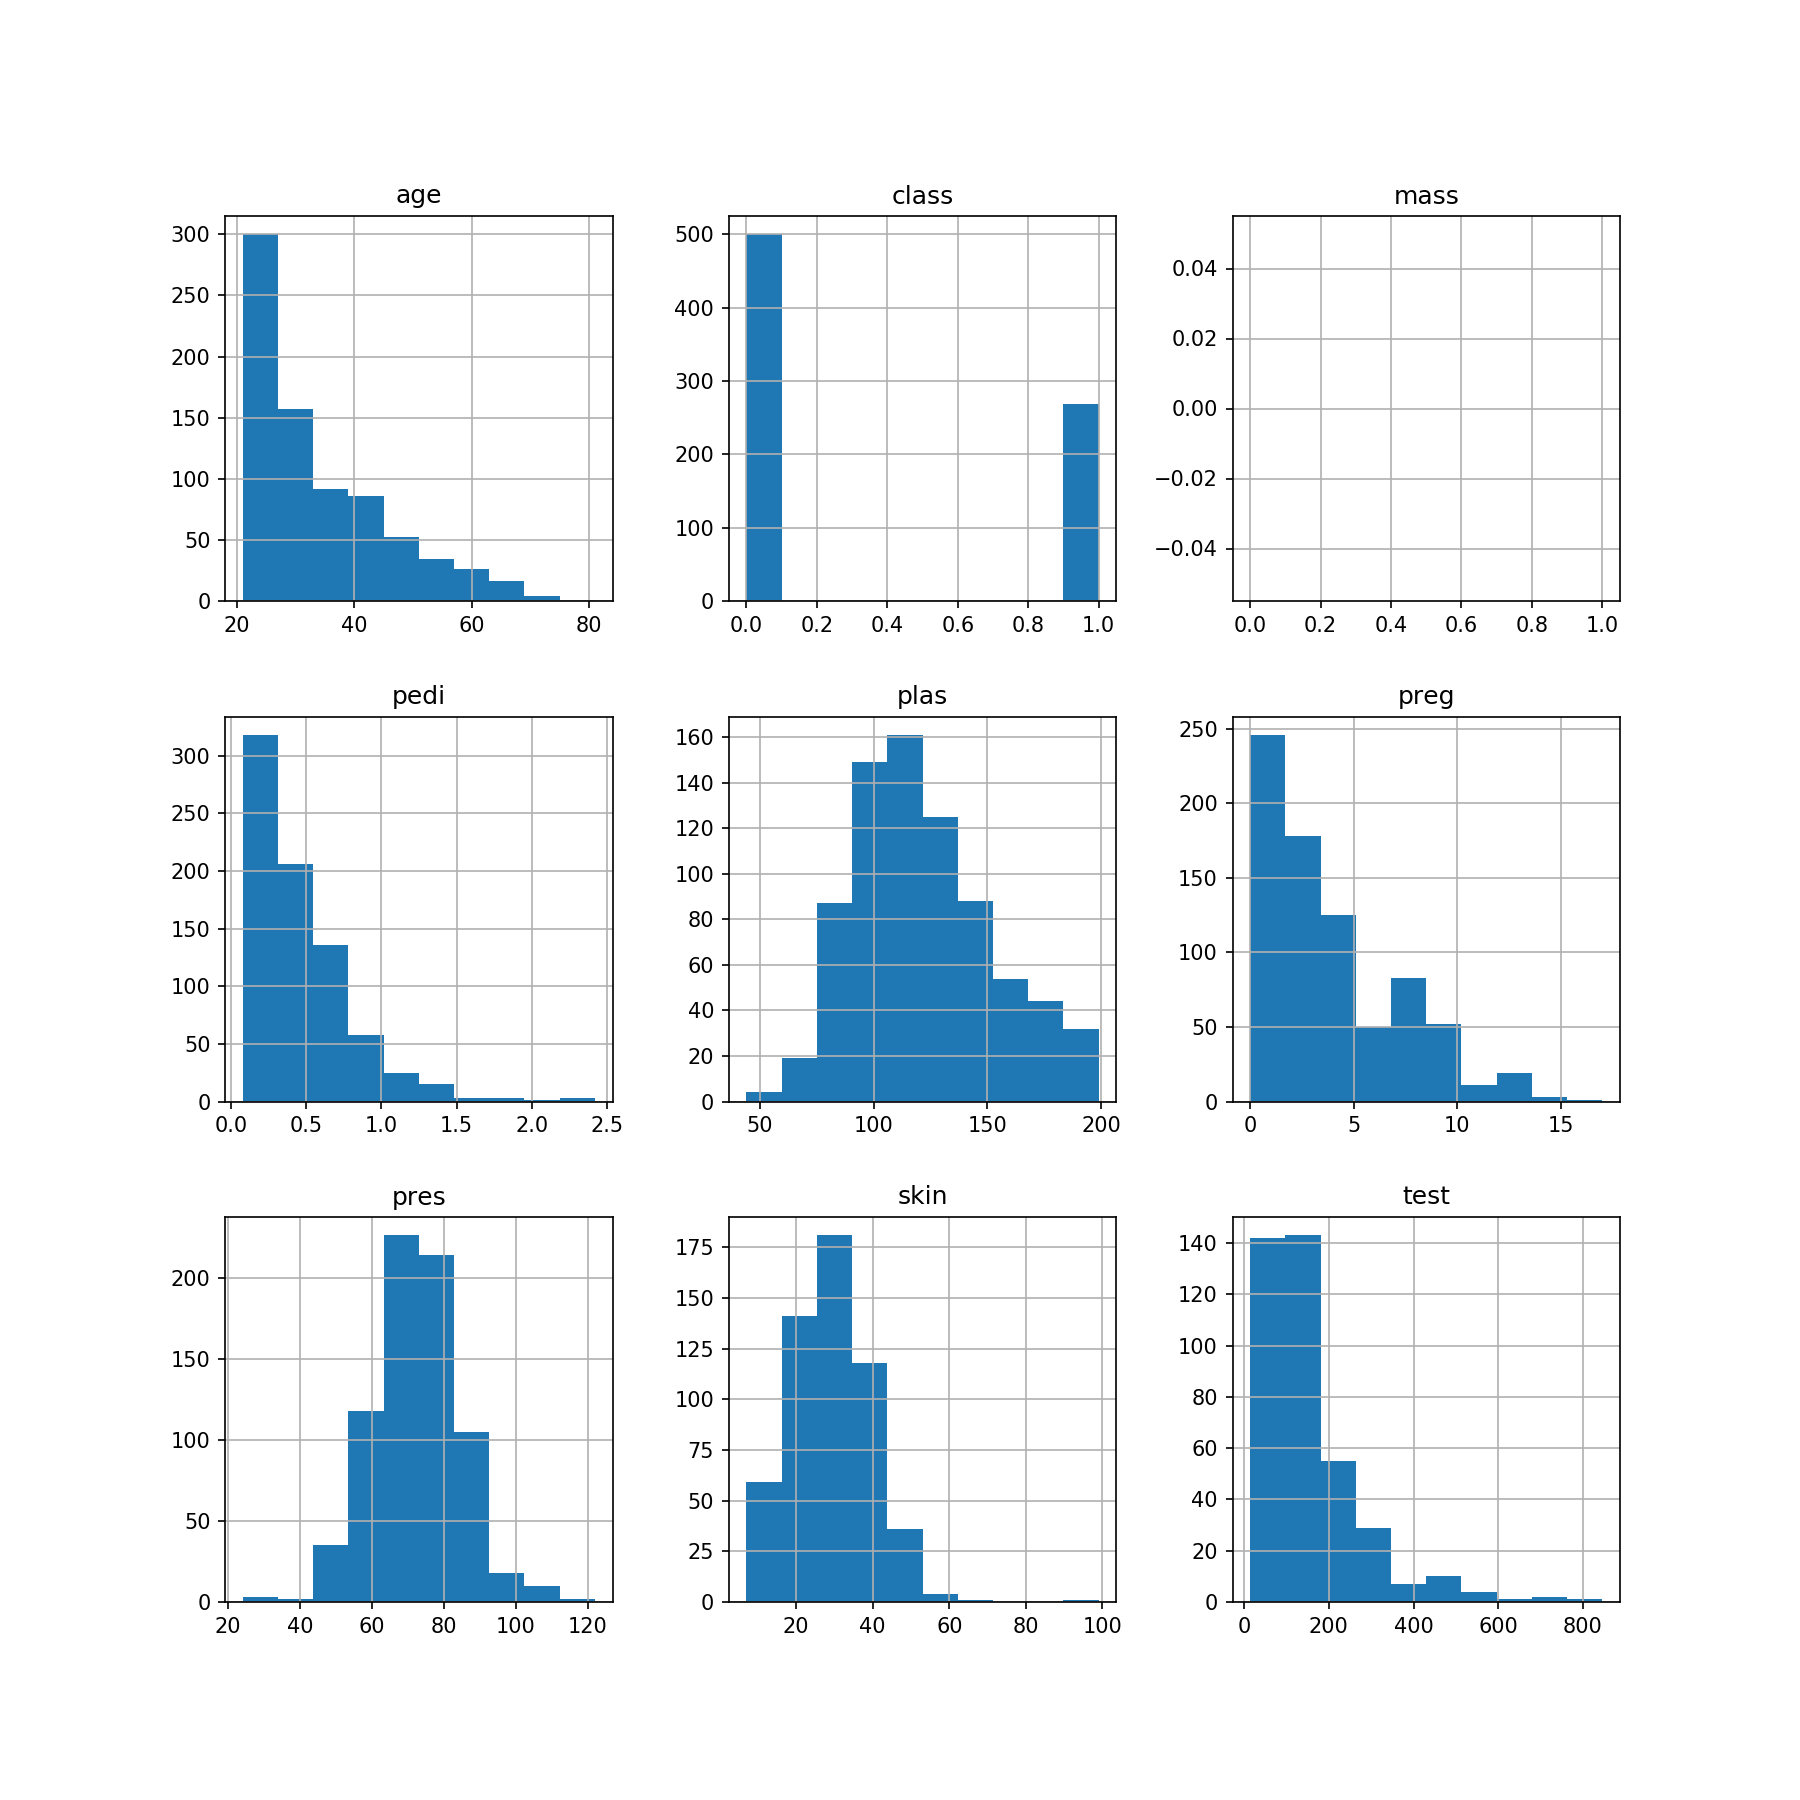

In [49]:
df.hist(figsize=(12,12))
plt.show()

In the above graphs, variable distributions are shown.
Next, Density Plots are shown for the dataset.

<IPython.core.display.Javascript object>


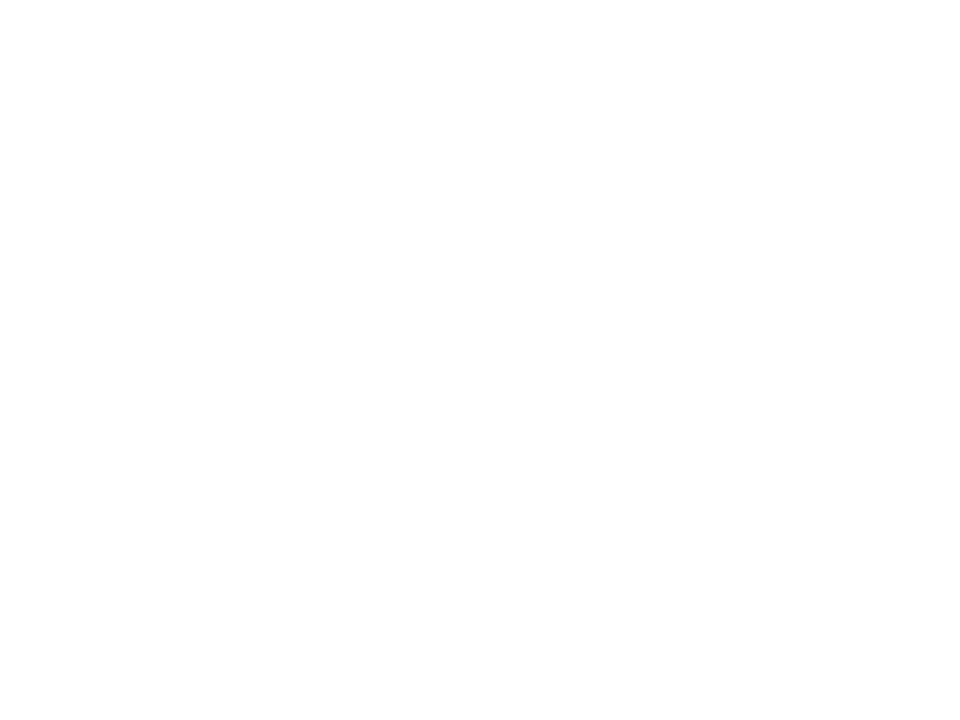

C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1352: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1352: RuntimeWarning: All-NaN axis encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1353: RuntimeWarning: All-NaN axis encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
C:\Users\jws0258\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1354: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


ValueError: `dataset` input should have multiple elements.

In [44]:
df.plot(kind='density', subplots=True, layout=(9,9), sharex=False, legend = True, fontsize = 10)
plt.show()

Next, box plots for each individual numerical column are shown below.


In [ ]:
df.plot(kind='box', subplots=True, layout = (3,2), sharex=False, sharey=False, figsize=(10,12))
plt.show()

Petal Length and Petal width have the highest interquartile variance. This can be somewhat expected because of the way their histograms looked.

Below, a scatter matrix is shown, which compares the general relation between each variable.

In [ ]:
scatter_matrix(df, alpha=0.8, figsize=(7,7))
plt.show()

Interestingly, the dataset is not randomized. There is a clear relation between ID, which is just an ordered unique identifier, and several of the variables. This is not an issue as long as the dataset is randomized during the train-test selection.



Separating Dataset into predictive and target variables.

Below, code is shown for separating variables into predictive features and the target variable. 

In [54]:

df1 = df.dropna()
darray1 = df1.values
X = darray1[:,1:7]
Y = darray1[:, 8]



Next, the data is split into train and test datasets. Here, there is only one split, with 33% of the data being assigned to the test dataset, and 67% of the data being assigned to the train dataset. 


In [55]:
test_size = .33
seed = 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state = seed)

Now, the model will be instantiated, trained, and tested for verification metrics.

In [56]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)


             precision    recall  f1-score   support

        0.0       0.74      0.92      0.82       162
        1.0       0.76      0.45      0.56        92

avg / total       0.75      0.75      0.73       254



Next, the Accuracy is shown

In [57]:
result = model.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 74.803%


Overall, there was an 74.8% accuracy for the model.

Next, Predictions for input data, [7, 4.2, 4.8, 1.3, 2.4, 3.1], and [5, 4.8, 4.0, 2, 3.1, .6] are shown.

In [60]:
print(model.predict([[7, 4.2, 4.8, 1.3, 2.4, 3.1]]))



[ 0.]


In [61]:
print(model.predict([[5, 4.8, 4.0, 2, 3.1, 6]]))

[ 0.]


Both examples were predicted 0, which means it would not classify the person as having diabetes

Instead of Using only one split for validation, K-fold cross validation can be used. Here, 10 folds are used, meaning that the dataset will be divided into 10 subsets, and ten models will be trained and tested.

In [62]:
n_splits = 10
seed = 8
kfold = KFold(n_splits=n_splits, random_state = seed)
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))


Accuracy: 0.762 (0.050)


Overall, with 10 fold cross validation, the accuracy was 76.2%, with a standard deviation in accuracy among all 10 folds of .05%